## Exploratory Data Analysis <a class="anchor"  id="chapter5"></a>

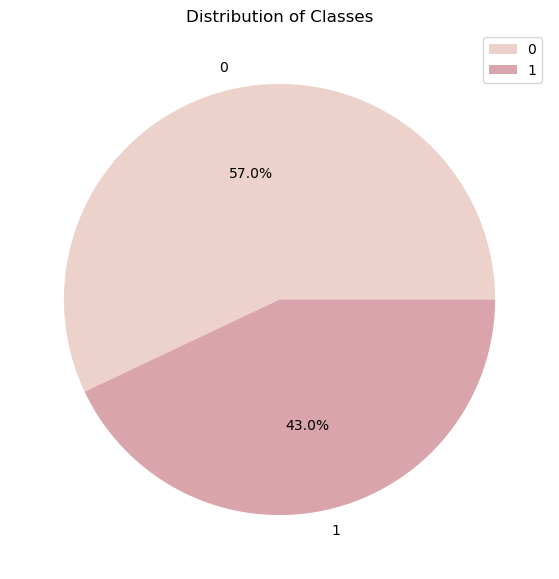

In [9]:
# Distribution of binary classes in training set

# Set palette
colors = sns.cubehelix_palette()

# Pie chart to show distribution
fig = plt.figure(figsize=(10, 7))
labels = ['0', '1']
sizes = train['target'].value_counts()
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%') 
plt.legend()
plt.title('Distribution of Classes')
plt.show()

Based on the above, the distribution of classes is pretty similar, with 57% of tweets belonging to the 'Non-Disaster' Class and 43% of tweets belonging to the 'Disaster' class. This means that we won't have to worry too much about class imbalance in the dataset, which would require us to resample the dataset or otherwise try to mitigate the effect of one class being a majority.

Below, I will define a function to extract metadata from the tweets in the dataset. Later, we will visualize this metadata for both Disaster and Non-Disaster tweets to see if there are differences between classes in features such as tweet length, number of hashtags, and the presence of spelling errors. 

In [10]:
# Define a function to plot features by class
def distr_by_class(data: pd.DataFrame, column: str, ax: plt.Axes):
    """
    Creates an overlaid histogram/distribution graph for features in a training set given their class.
    
    Parameters:
    - data (pd.DataFrame): The dataframe containing data to plot.
    - column (str): The column to plot.
    - ax (plt.Axes): The axes to plot on.
    """
    # Create a histogram with overlaid density plot
    sns.histplot(data=data, x=column, hue='target', kde=True, stat='density', common_norm=False, ax=ax)
    
    # Set the title of the plot
    ax.set_title(f'{column} distribution by class')


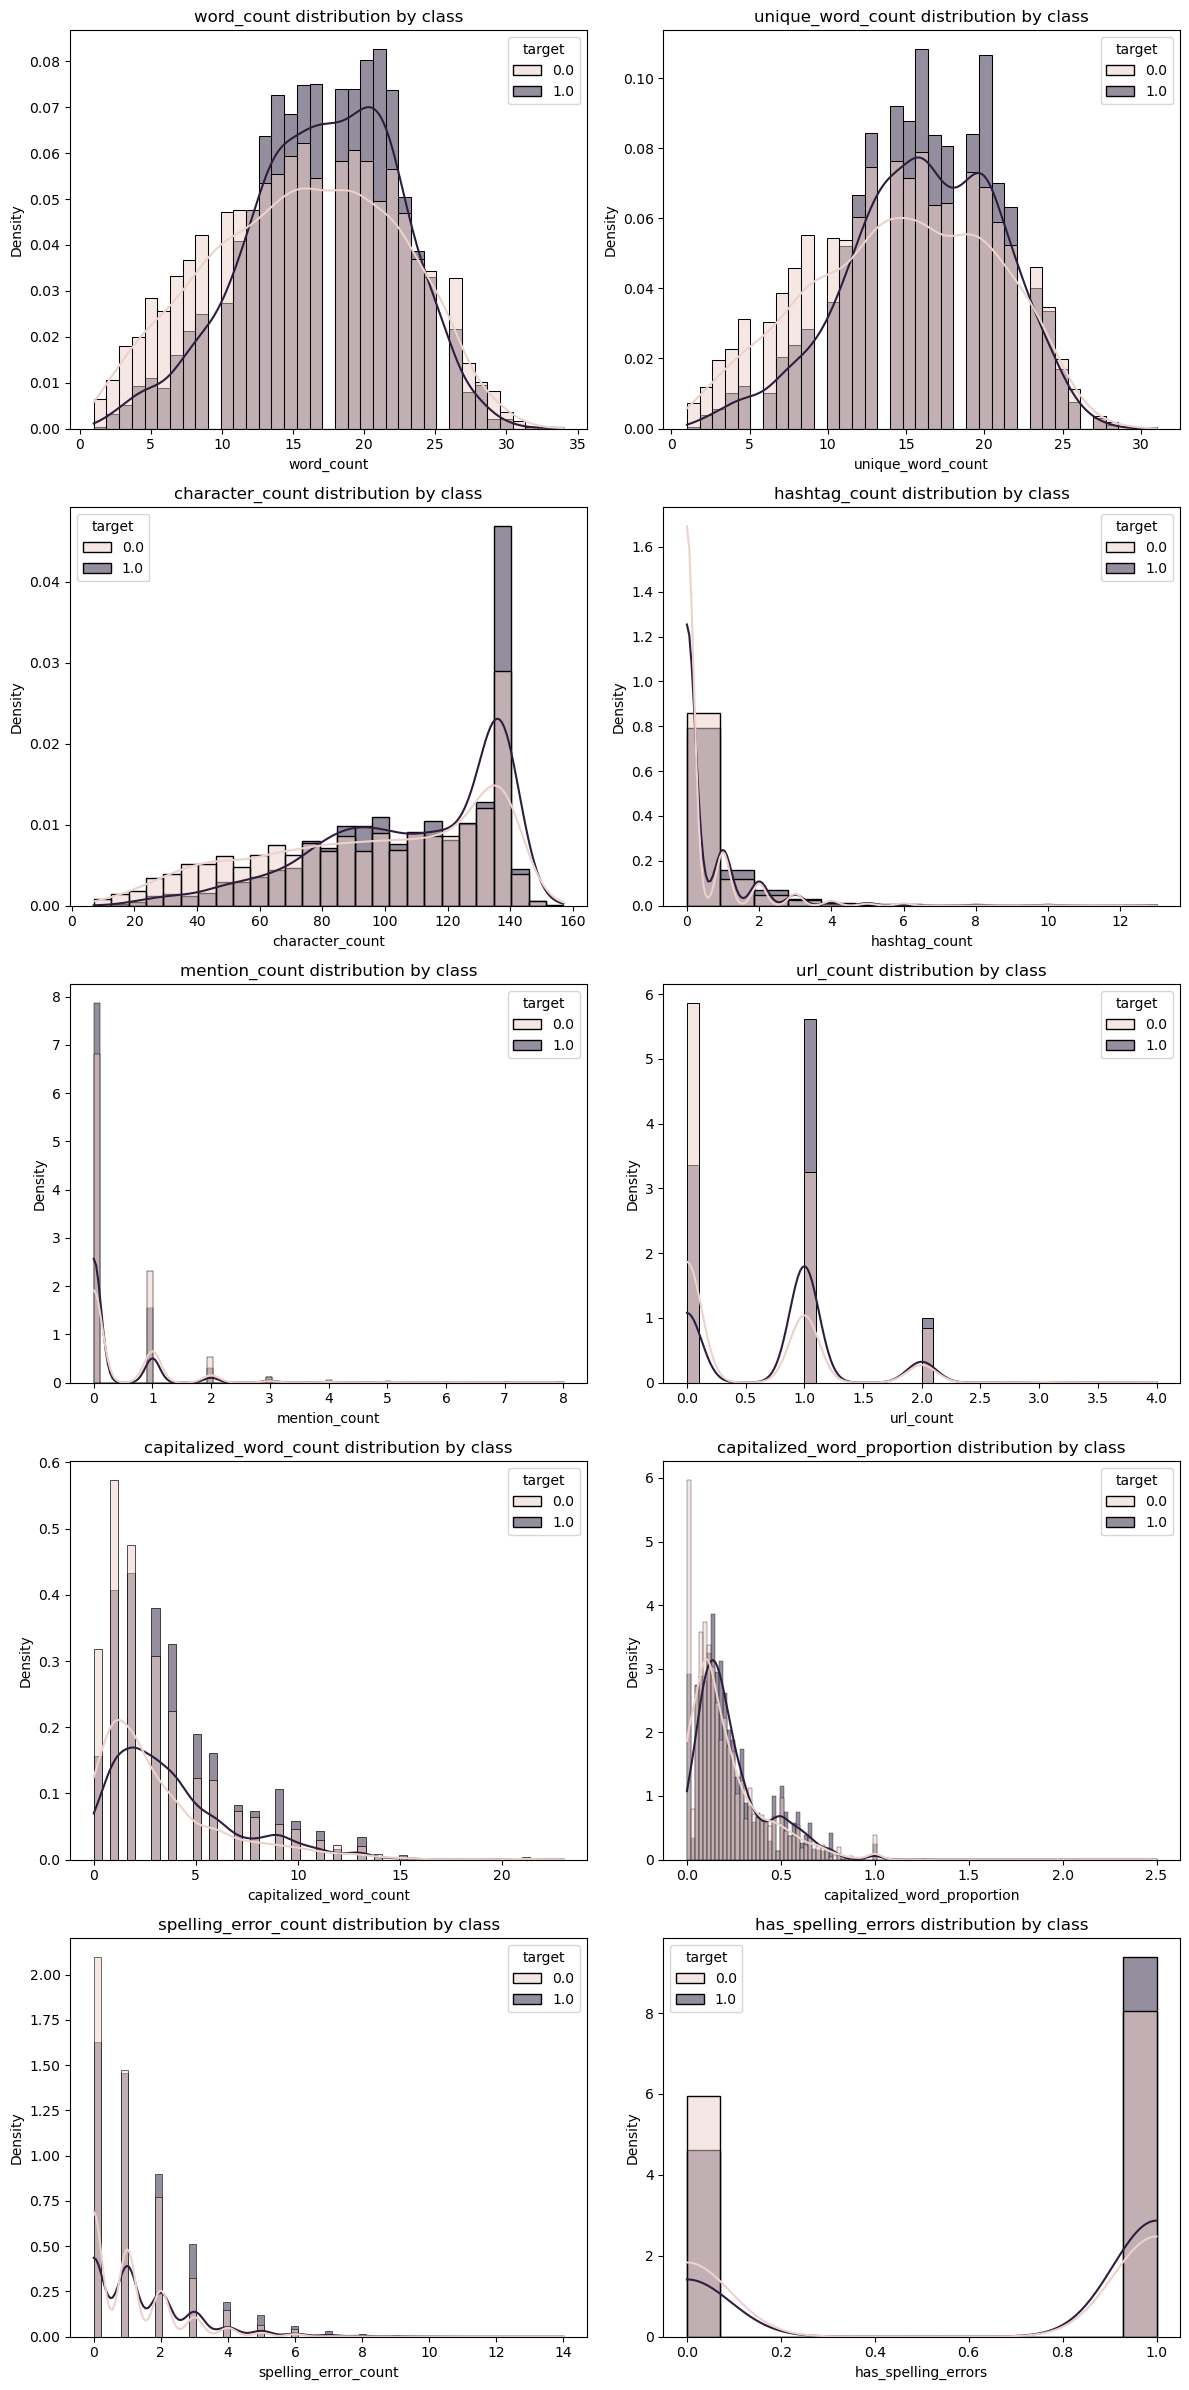

In [11]:
# Visualizing distribution of pre-cleaned dataset 
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 24))
columns = ['word_count', 'unique_word_count', 'character_count', 'hashtag_count', 'mention_count', 'url_count', 
          'capitalized_word_count', 'capitalized_word_proportion', 'spelling_error_count', 'has_spelling_errors']
fig.subplots_adjust(hspace=0.3)

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    distr_by_class(df, column, ax=axs[row, col])

plt.tight_layout()
plt.show()

Based on the above, it appears like there are some differences between Disaster and Non-Disaster tweets. Specifically, disaster tweets tend to be longer, contain more URLs, and contain more capitalized words, among other features that can be seen above.  

In [12]:
# Create metadata dataframe that contains metadata
metadata = df[['word_count', 'unique_word_count', 'character_count', 'hashtag_count', 'mention_count', 'url_count', 
          'capitalized_word_count', 'capitalized_word_proportion', 'spelling_error_count', 'has_spelling_errors']]

We will also visualize the most common n-grams in tweets by using the function defined below. n-grams are strings containing n sequential words. A unigram is just one word, whereas bigrams and trigrams are 2 or 3 words that frequently appear near to each other, respectively.

In [13]:
# Define function that counts occurrence of n-grams
def ngram_occurrence(df: pd.DataFrame, n: int = 1) -> pd.DataFrame:
    """
    This function counts the occurrence of n-grams in the 'text_cleaned' column of a given pandas DataFrame, 
    and returns a DataFrame with two columns: 'ngram' and 'count'.
    
    Parameters:
    - df: pandas DataFrame with a 'text_cleaned' column
    - n: integer specifying the number of words in each n-gram
    
    Returns:
    - counts_df: pandas DataFrame with two columns: 'ngram' (containing the n-grams) and 'count' 
    (containing the number of occurrences of each n-gram)
    """
    
    # Initialize a CountVectorizer with stop words and n-gram range
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(n,n))
    
    # Convert cleaned text data to a matrix of n-gram counts
    matrix = vectorizer.fit_transform(df['text_cleaned'])
    
    # Sum the counts of each n-gram across all tweets
    counts = matrix.sum(axis=0).tolist()[0]
    
    # Get the feature names (i.e., the n-grams) from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame with the n-grams and their counts
    counts_df = pd.DataFrame({'ngram':feature_names, 'count':counts})
    
    # Reset the index of the DataFrame to start at 0
    counts_df = counts_df.reset_index(drop=True)
    
    # Return the DataFrame with n-grams and their counts
    return counts_df

# Creating dataframes with n-grams and their counts for n=1, 2, and 3
disaster_counts_df = ngram_occurrence(df[df['target']==1], n=1)
non_disaster_counts_df = ngram_occurrence(df[df['target']==0], n=1)

disaster_bigram_counts_df = ngram_occurrence(df[df['target']==1], n=2)
non_disaster_bigram_counts_df = ngram_occurrence(df[df['target']==0], n=2)

disaster_trigram_counts_df = ngram_occurrence(df[df['target']==1], n=3)
non_disaster_trigram_counts_df = ngram_occurrence(df[df['target']==0], n=3)

Below, I will define a function to plot the 10 most common n-grams for Disaster and Non-Disaster tweets. 

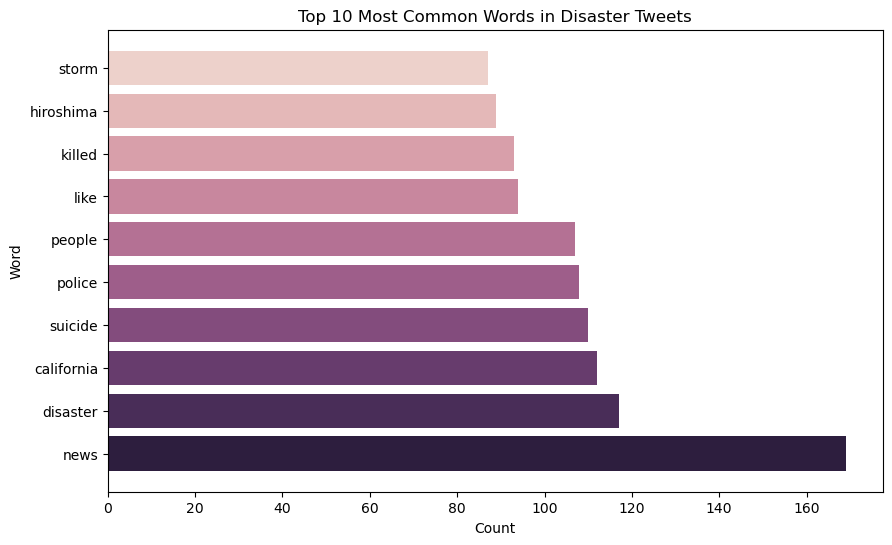

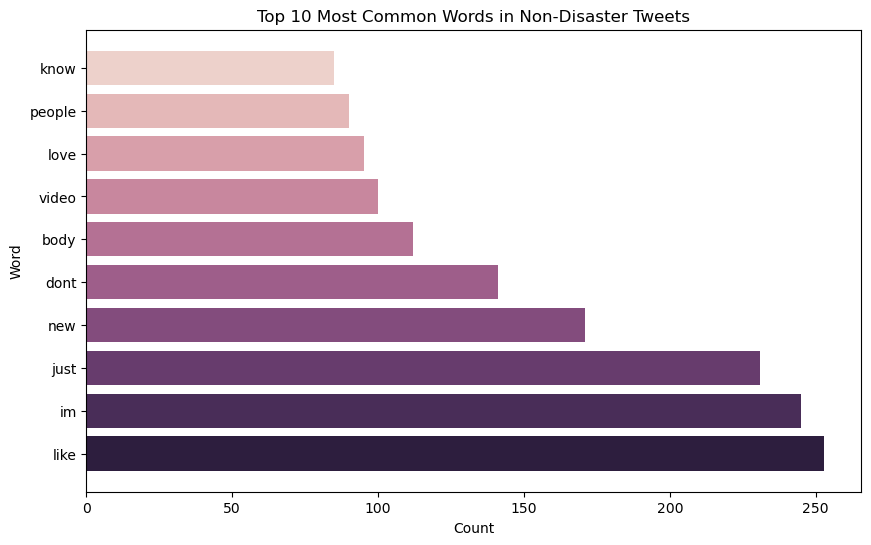

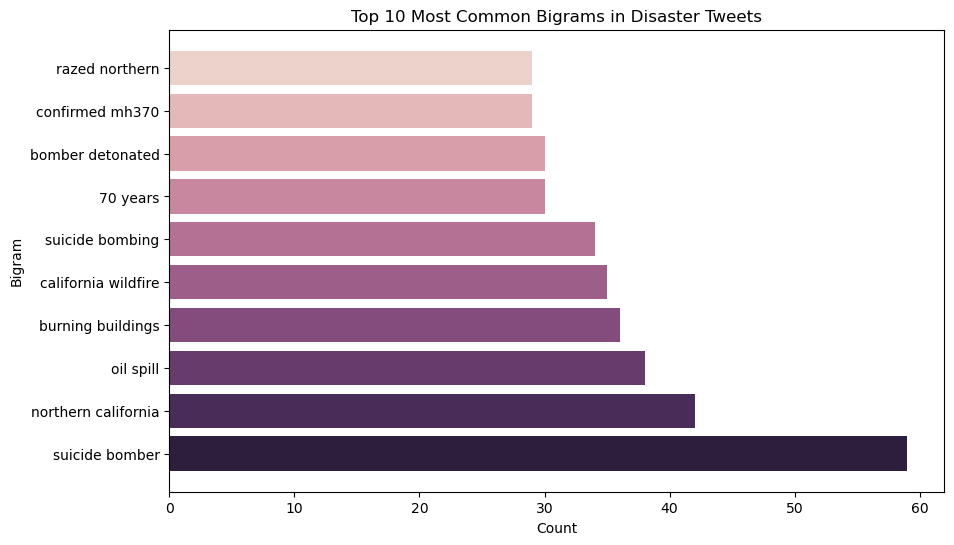

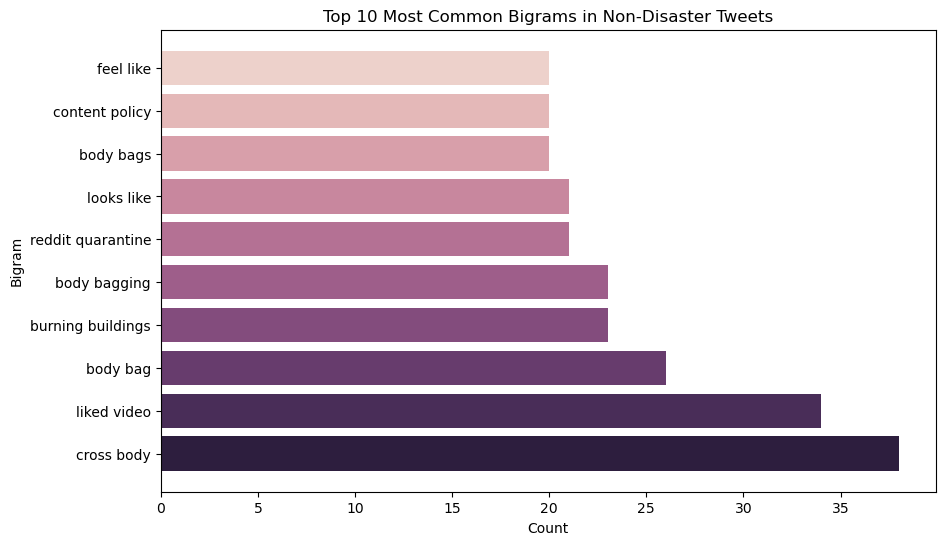

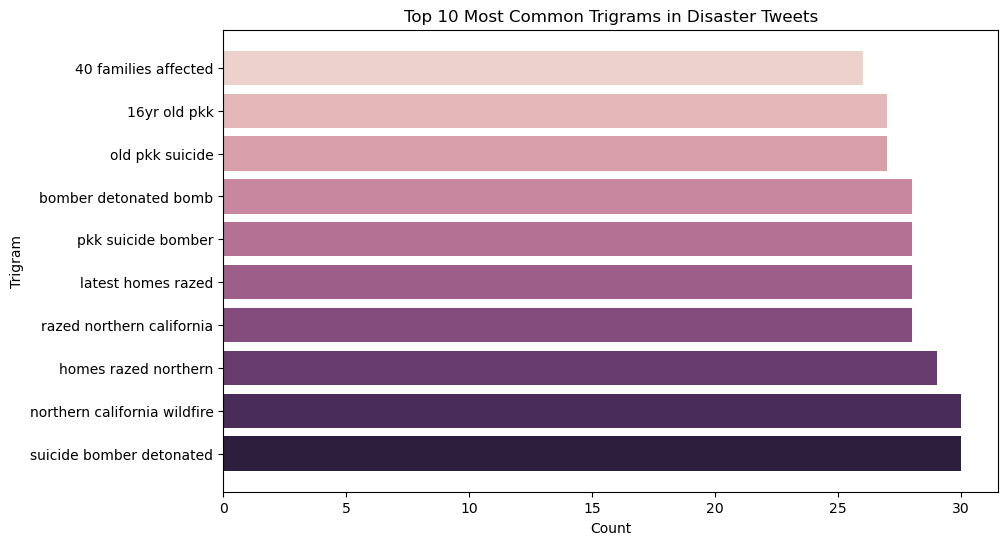

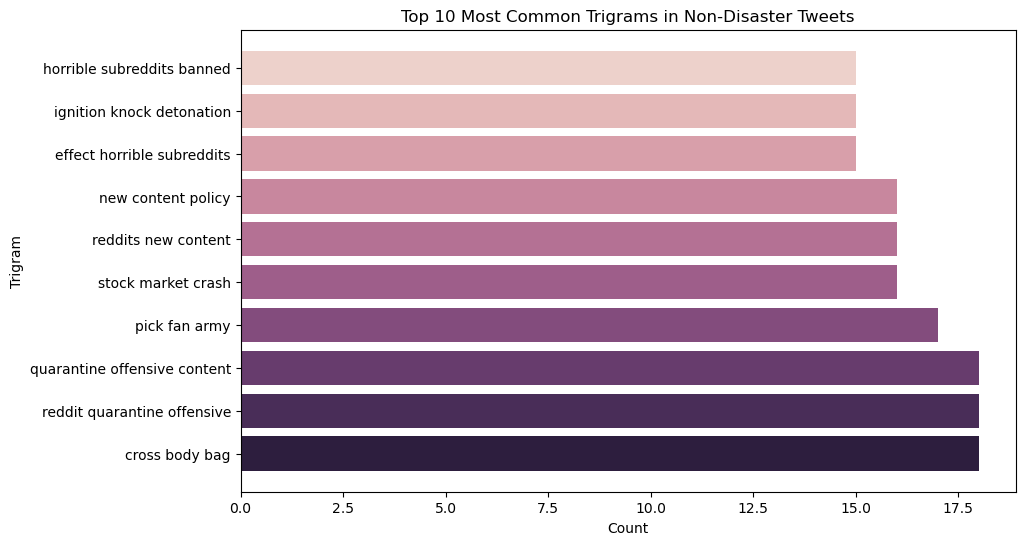

In [14]:
def plot_top_ngrams(data: pd.DataFrame, column: str, ngram: str, disaster_class: str):
    """
    Given a DataFrame of ngram counts, plot the top 10 most common ngrams for a given class 
    (e.g., disaster or non-disaster) and ngram type (e.g., unigrams, bigrams, or trigrams).

    Parameters:
        data (pd.DataFrame): DataFrame of ngram counts, with columns for 'ngram' and 'count'.
        column (str): Name of column in `data` that contains the ngrams.
        ngram (str): Type of ngram to plot (e.g., 'unigram', 'bigram', or 'trigram').
        disaster_class (str): Name of class to plot (e.g., 'Disaster' or 'Non-Disaster').
    """
    top_ngrams = data.sort_values(ascending=False, by='count').head(10)
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = sns.cubehelix_palette(n_colors=10, reverse=True)
    ax.barh(top_ngrams['ngram'], top_ngrams['count'], color=colors)
    ax.set_title(f'Top 10 Most Common {ngram}s in {disaster_class} Tweets')
    ax.set_ylabel(f'{ngram}')
    ax.set_xlabel('Count')
    plt.show()

plot_top_ngrams(disaster_counts_df, 'ngram', 'Word', 'Disaster')
plot_top_ngrams(non_disaster_counts_df, 'ngram', 'Word', 'Non-Disaster')
plot_top_ngrams(disaster_bigram_counts_df, 'ngram', 'Bigram', 'Disaster')
plot_top_ngrams(non_disaster_bigram_counts_df, 'ngram', 'Bigram', 'Non-Disaster')
plot_top_ngrams(disaster_trigram_counts_df, 'ngram', 'Trigram', 'Disaster')
plot_top_ngrams(non_disaster_trigram_counts_df, 'ngram', 'Trigram', 'Non-Disaster')

Most of the common n-grams shown above make sense. For Disaster tweets, the n-grams tend to be related to actual disasters, such as "hiroshima", "california wildfire", and "bomber detonated bomb". On the other hand, Non-Disaster tweets seem to be common language used by everyday tweeters or common words that appear in non-disaster headlines, such as "like", "looks like", and "stock market crash".  

I did find the presence of "body bag" in all its forms in Non-Disaster tweets to be quite shocking. Once inspecting the tweets containing these words, I realized that "body bag" most commonly referred to the accessory (like a cross-body bag). In rare cases, the bigram "body bagging" is used as a slang term to describe when a person is overwhelmingly defeating another in a competition, argument, or conflict. These tweets are not referring to actual body bags!

Just because it's fun to visualize the most common words in a word cloud shaped like a twitter logo, I will do so below :) 

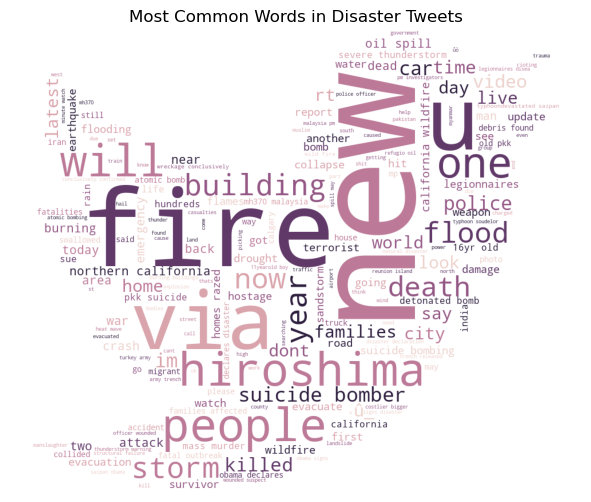

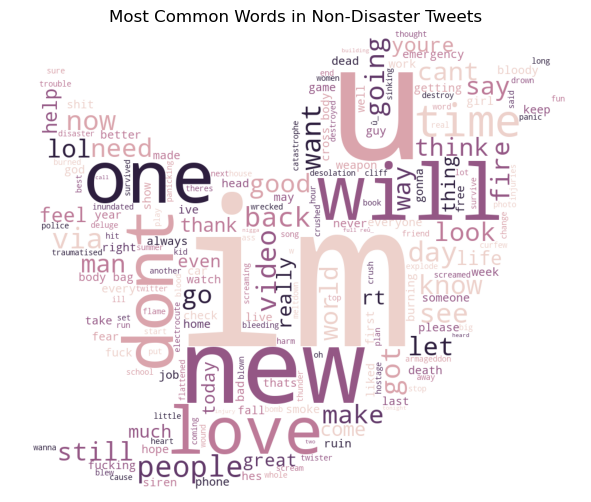

In [15]:
import matplotlib.colors as mcolors

# Create list of all tweets by class
disaster_text = df[df['target']==1]['text_cleaned'].tolist() 
non_disaster_text = df[df['target']==0]['text_cleaned'].tolist() 

# Join words and lowercase
disaster_text = ' '.join(disaster_text).lower()
non_disaster_text = ' '.join(non_disaster_text).lower()

# Create mask for word cloud
mask = np.array(Image.open('/kaggle/input/twitter-mask/twitter_mask.png'))

# Convert cubehelix_palette colors to hexadecimal color codes
hex_codes = [mcolors.rgb2hex(color) for color in colors]

# Define color function for word cloud
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return hex_codes[np.random.randint(len(hex_codes))]

# Create wordclouds in shape of twitter logo
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True,
                      background_color='white',
                      mask=mask, 
                      color_func=color_func).generate(disaster_text)

# Plot wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.title('Most Common Words in Disaster Tweets')
plt.axis('off')
plt.show()

# Create wordclouds in shape of twitter logo
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True,
                      background_color='white',
                      mask=mask, 
                      color_func=color_func).generate(non_disaster_text)

# Plot wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.title('Most Common Words in Non-Disaster Tweets')
plt.axis('off')
plt.show()